### Učitavanje podataka

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [49]:
dataset = pd.read_csv("Training Dataset.csv")


### Početni pregled podataka


Skup podataka za treniranje dohvaćen je iz UCI Machine Learning Repository. Podatci su originalno pohranjeni u **arff** datoteci.
Kako bi se podatke jednostavno pohranilo u DataFrame objekt **pandas** biblioteke, originalna datoteka je konvertirana u **csv** datoteku.

Skup se sastoji od vrijednosti 30 značajki koje dokazano služe kao učinkoviti indikatori phishing web stranica. Pohranjene su vrijednosti za ukupno
11055 web stranica.

In [50]:
dataset.shape

(11055, 32)

In [51]:
dataset.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


Značajke poprimaju vrijednosti iz diskretnog skupa {1, 0, -1}.
Vrijednosti služe kao zastavice koje upućuju na legitimnost stranice.
Sve značajke mogu poprimiti vrijednosti 1 i -1, dok 0 mogu poprimiti samo neke.

- 1  - stranica je legitimna sudeći prema značajki
- -1 - stranica nije legitimna sudeći prema značajki
- 0  - stranica je sumnjiva sudeći prema značajki

Svi tipovi podataka su integeri.

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [54]:
dataset.nunique()

id                             11055
having_IP_Address                  2
URL_Length                         3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

Pojašnjenje značajki dostupno je na linku: https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Phishing%20Websites%20Features.docx

Uz 30 značajki među podacima je i identifikator stranice, te oznaka klase **result** koja poprima vrijednosti 1 ako je stranica legitimna, te -1 ako nije.

### Monotoni atributi

Atribut id je monoton pa ga je potrebno ukloniti.

In [55]:
dataset.drop('id', axis='columns', inplace=True)

### Nedostajući podatci

Nedostajućih podataka nema.

In [56]:
dataset.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Stršeći podatci

S obzirom da je skup vrijednosti značajki diskretan i ima tek tri elementa, stršećih vrijednosti nema.


### Vizualizacija podataka

Sljedeći graf prikazuje za svaku značajku koji je broj stranica koje su označene kao legitimne, phishing i sumnjive.

Oznaka klase **result** prikazuje stvarni broj legitimnih i phishing stranica u skupu podataka.

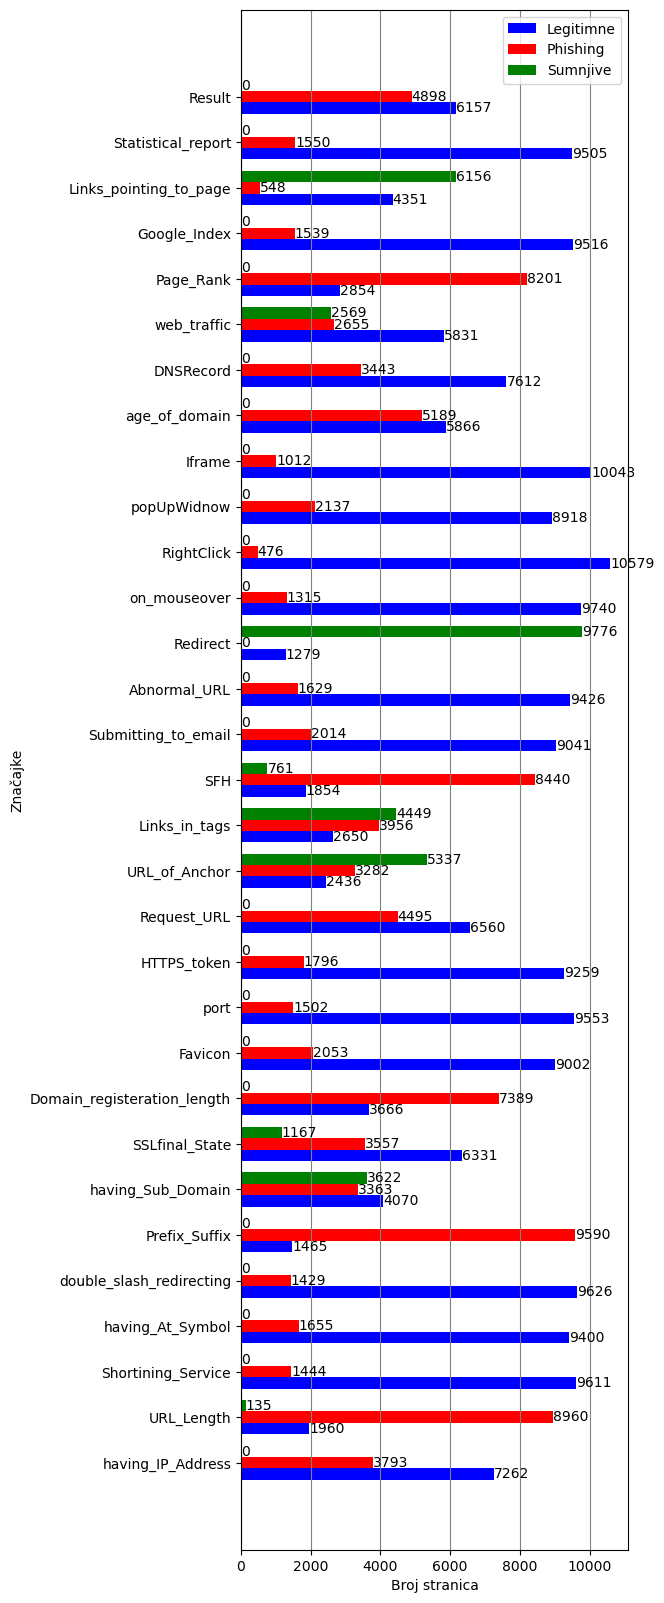

In [57]:
features = dataset.columns.values
legitimate_counts = []
phishing_counts = []
suspicious_counts = []

for feature in features:
    legitimate_counts.append(dataset.loc[dataset[feature] == 1].shape[0])
    phishing_counts.append(dataset.loc[dataset[feature] == -1].shape[0])
    suspicious_counts.append(dataset.loc[dataset[feature] == 0].shape[0])

fig, ax = plt.subplots()
fig.set_size_inches(5, 20)
    
width = 0.25
br1 = np.arange(len(legitimate_counts))
br2 = [x + width for x in br1]
br3 = [x + width for x in br2]

bars1 = plt.barh(br1, legitimate_counts, color='b', height=width, label="Legitimne")
bars2 = plt.barh(br2, phishing_counts, color='r', height=width, label="Phishing")
bars3 = plt.barh(br3, suspicious_counts, color='g', height=width, label="Sumnjive")

ax.bar_label(bars1)
ax.bar_label(bars2)
ax.bar_label(bars3)

plt.xlabel('Broj stranica')
plt.ylabel('Značajke')
plt.grid(color='gray', axis='x')
plt.yticks([r + width for r in range(len(legitimate_counts))], features)
plt.legend()
plt.show()

# Replikacija rezultata



In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Za replikaciju rezultata članka te provođenje algoritama strojnog učenja, potrebno je podatkovni skup podijeliti na skup za treniranje i skup za testiranje.

In [140]:
x = dataset.drop('Result', axis='columns')
y = dataset['Result']

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)

# BPNN

In [115]:
clf = MLPClassifier(hidden_layer_sizes=(20, 10, 5),
                        max_iter=500,
                        activation='relu',
                        solver='adam')

In [116]:
# without feature selection
clf.fit(trainX, trainY)
y_predicted = clf.predict(testX)


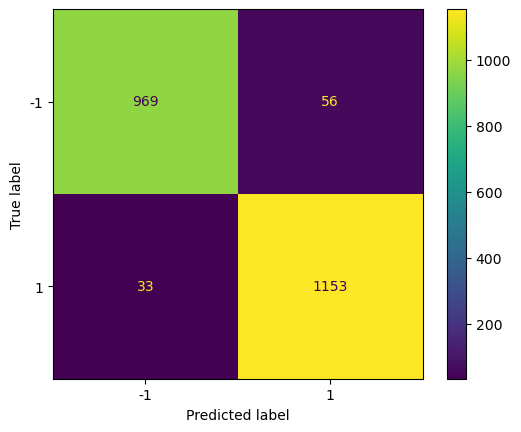

In [117]:
disp = ConfusionMatrixDisplay(confusion_matrix(testY, y_predicted_bpnn), display_labels=bpnn_clf.classes_)
disp.plot()

In [118]:
print(classification_report(testY, y_predicted))

              precision    recall  f1-score   support

          -1       0.99      0.92      0.95      1025
           1       0.94      0.99      0.96      1186

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# Naive Bayes

In [119]:
clf = BernoulliNB()

In [120]:
clf.fit(trainX, trainY)
y_predicted = clf.predict(testX)

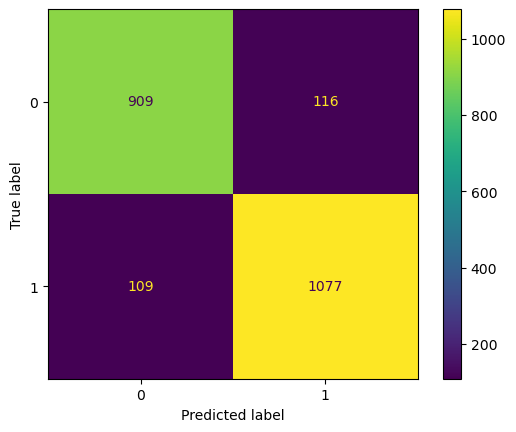

In [121]:
disp = ConfusionMatrixDisplay(confusion_matrix(testY, y_predicted))
disp.plot()

In [122]:
print(classification_report(testY, y_predicted))

              precision    recall  f1-score   support

          -1       0.89      0.89      0.89      1025
           1       0.90      0.91      0.91      1186

    accuracy                           0.90      2211
   macro avg       0.90      0.90      0.90      2211
weighted avg       0.90      0.90      0.90      2211



# Decision Tree

In [123]:
clf = DecisionTreeClassifier()

In [124]:
# without feature selection
clf.fit(trainX, trainY)
y_predicted = clf.predict(testX)

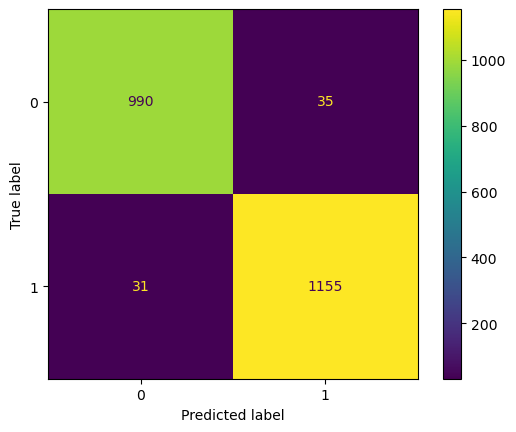

In [125]:
disp = ConfusionMatrixDisplay(confusion_matrix(testY, y_predicted))
disp.plot()

In [126]:
print(classification_report(testY, y_predicted))

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97      1025
           1       0.97      0.97      0.97      1186

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



# Random forest

In [127]:
clf = RandomForestClassifier(n_estimators=100)

In [128]:
# without feature selection
clf.fit(trainX, trainY)
y_predicted = clf.predict(testX)

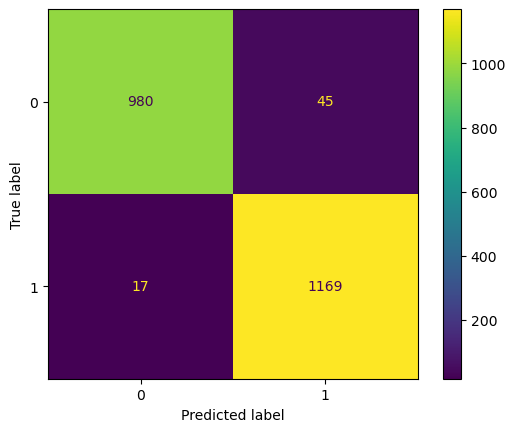

In [129]:
disp = ConfusionMatrixDisplay(confusion_matrix(testY, y_predicted))
disp.plot()

In [130]:
print(classification_report(testY, y_predicted))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1025
           1       0.96      0.99      0.97      1186

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



# K Nearest Neighbors

In [131]:
clf = KNeighborsClassifier()

In [132]:
# without feature selection
clf.fit(trainX, trainY)
y_predicted = clf.predict(testX)

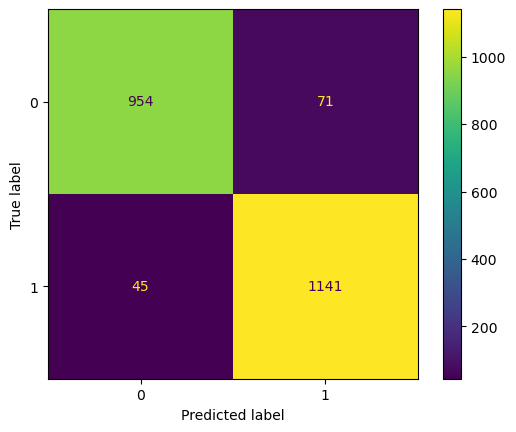

In [133]:
disp = ConfusionMatrixDisplay(confusion_matrix(testY, y_predicted))
disp.plot()

In [134]:
print(classification_report(testY, y_predicted))

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1025
           1       0.94      0.96      0.95      1186

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



# Support Vector Machine

In [135]:
clf = SVC()

In [136]:
# without feature selection
clf.fit(trainX, trainY)
y_predicted = clf.predict(testX)

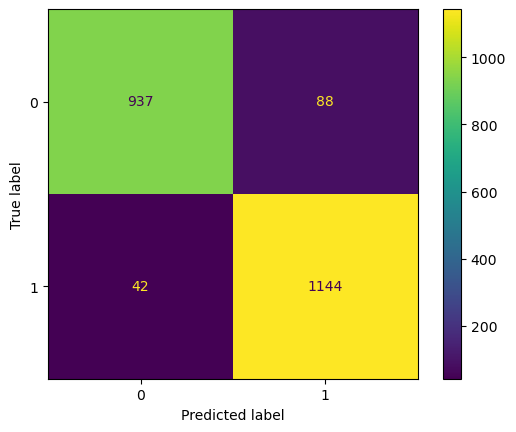

In [137]:
disp = ConfusionMatrixDisplay(confusion_matrix(testY, y_predicted))
disp.plot()

In [139]:
print(classification_report(testY, y_predicted))

              precision    recall  f1-score   support

          -1       0.96      0.91      0.94      1025
           1       0.93      0.96      0.95      1186

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211

